In [72]:
using Pkg
Pkg.instantiate()

using DevCommunities
using SimpleHypergraphs

g = build_hg("../../hgs/apl.hg")

(Union{Nothing, Bool}[true nothing … nothing nothing; true nothing … nothing nothing; … ; nothing nothing … true nothing; nothing nothing … nothing true], Dict(1144 => 1145, 1175 => 1176, 719 => 720, 1028 => 1029, 699 => 700, 831 => 832, 1299 => 1300, 1074 => 1075, 319 => 320, 687 => 688…), Dict(719 => [932, 933], 1028 => [69, 1241], 699 => [83, 905], 831 => [716], 1074 => [995, 1282], 319 => [36, 423, 424], 687 => [721, 889], 185 => [69, 256], 823 => [83, 1043], 1090 => [1298, 1299]…))

In [43]:

# rm1 = random_model(500, 500)
# hg_save("../../randoms/random500", rm1)
#1000x1000
# motifs_random = [0,87,472,256977,14,112208,0,218303,501,3758514,0,5467523,9213,319352,7407153,144547536,0,32143,0,412031,4,1688973,0,302,112254,1626941]
#100x100
# motifs_random = [0,6,299,2346,11,724,118,5423,30,12916,2,14070,107,1885,20589,86915,0,519,1,3951,4,5240,0,11,695,3849]
#500x500
motifs_random = [3,19,849,77852,62,17699,35,100549,1168,870515,9,959371,7729,154033,1519553,16308126,0,9921,5,120155,2,226943,0,140,17499,257965]

26-element Vector{Int64}:
      3
     19
    849
  77852
     62
  17699
     35
 100549
   1168
 870515
      ⋮
   9921
      5
 120155
      2
 226943
      0
    140
  17499
 257965

In [39]:
# num_motifs = [1077,818707,23,7,5702,6152,25,1,131,27,10,4,0,0,0,0,5,1,8390,1397,41097,124693,9,582,145,53]

function cps(motifs, motifs_random)
    eps = 1 #fixed in the paper
    deltas = []
    sum_deltas = 0
    for i in 1:length(motifs)
        t = (motifs[i]-motifs_random[i])/(motifs[i]+motifs_random[i]+eps)
        push!(deltas, t)
        sum_deltas += t^2
    end
    cp = []
    for i in 1:length(motifs)
        push!(cp, deltas[i]/sqrt(sum_deltas))
    end
    return cp
end

# cp = cps(num_motifs, motifs_random)
# println(cp)

cps (generic function with 2 methods)

In [44]:
using CSV, DataFrames
data = CSV.read("../../hgs/motifs.csv", DataFrame, header=false)

# for each column create an array of the values
w = open("../../results/cpprofiles500.csv", "w")

for i in 1:size(data, 2)
    col = data[:, i]
    col = convert(Array{Int64, 1}, col)
    cp = cps(col, motifs_random)
    new_line = join(cp, ",")
    
    write(w, new_line * "\n")
end
close(w)



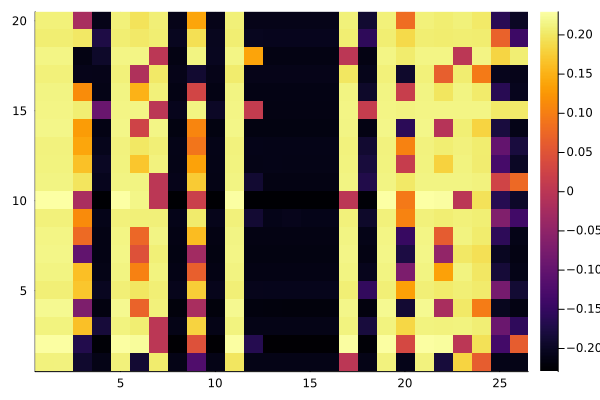

In [46]:
using Plots, LinearAlgebra
using DelimitedFiles
# read matrix from csv file
m = readdlm("../../results/cpprofiles1000.csv", ',', Float64)
heatmap(m)

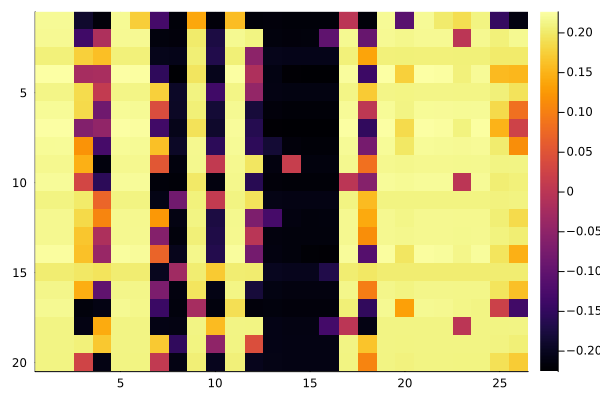

In [42]:
using Plots, LinearAlgebra
using DelimitedFiles
# read matrix from csv file
m = readdlm("../../results/cpprofiles100.csv", ',', Float64)
heatmap(m, yflip=true)

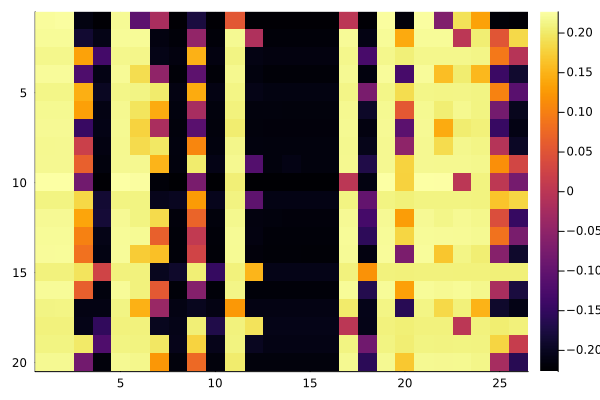

In [45]:
# read matrix from csv file
m = readdlm("../../results/cpprofiles500.csv", ',', Float64)
heatmap(m, yflip=true)

In [62]:
ccs = SimpleHypergraphs.get_connected_components(g[1])
ccs = sort(ccs, by=length, rev=true)
# distribution of component sizes
ccs_len = length.(ccs)



355-element Vector{Int64}:
 206
 143
  57
  44
  30
  29
  22
  15
  13
  12
   ⋮
   1
   1
   1
   1
   1
   1
   1
   1
   1

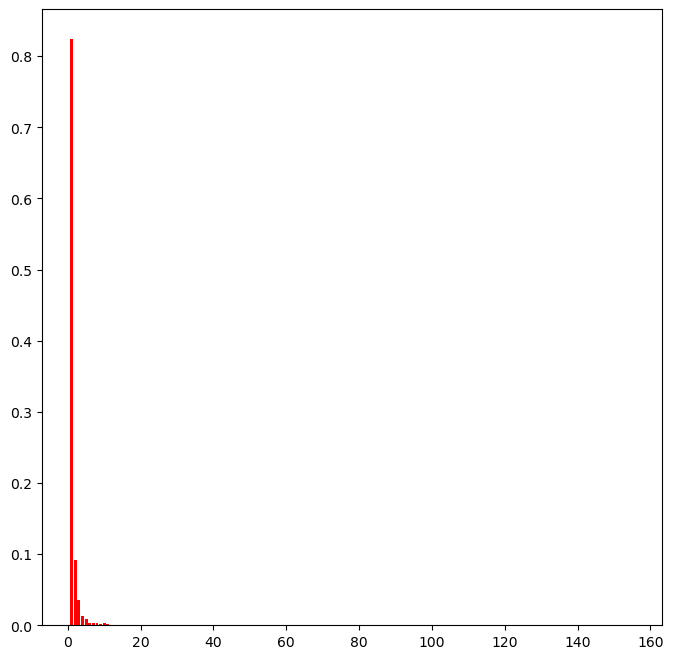

In [71]:
using PyPlot
dict_degree = DevCommunities.degree_histogram(g[1], normalized=true)
# bar plot of the degree distribution
fig,axs = subplots()
axs.bar(collect(keys(dict_degree)), collect(values(dict_degree)), color="red")
gcf()
